In [45]:
from lifelines.datasets import load_dd
from lifelines.utils import concordance_index
from matplotlib import pyplot as plt
import numpy as np

from gbnet.models.survival import hazard_survival


############## Load and format data
dd = load_dd()

categorical_cols = [
    'ctryname', 'cowcode2', 'politycode', 'un_region_name',
    'un_continent_name', 'democracy', 'regime',
]
continuous_cols = ['start_year']

for c in categorical_cols:
    dd[c] = dd[c].fillna('<NA>').astype('category')

train_df = dd[categorical_cols + continuous_cols].copy()
train_df['unit_id'] = range(train_df.shape[0])

train_y = dd[['duration', 'observed']].rename(
    columns={'duration': 'time', 'observed': 'event'}
).copy()
train_y['unit_id'] = range(train_y.shape[0])


############## Fit model
HSM = hazard_survival.HazardSurvivalModel(nrounds=100)
HSM.fit(train_df, train_y)

HazardSurvivalModel(params={'max_delta_step': 1})

In [46]:
expected_survival_time = HSM.predict(train_df)
concordance_index(train_y['time'], expected_survival_time['predicted_median_time'], train_y['event'] == 1)  

0.9702118817108111

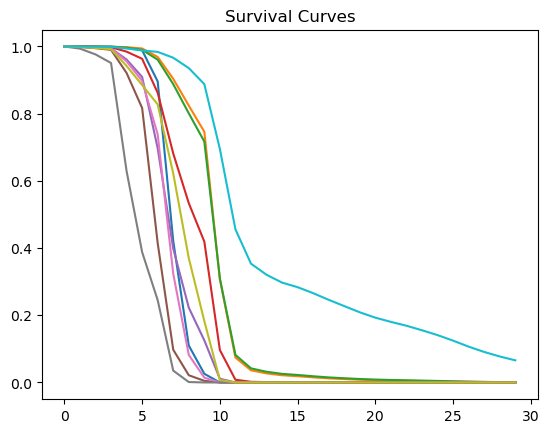

Text(0.5, 1.0, 'Hazard Curves')

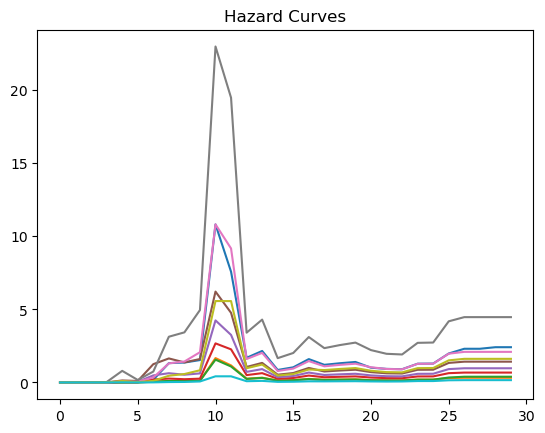

In [47]:
surv = HSM.predict_survival(train_df, np.arange(30))

for unit in range(10):
    sel = surv['unit_id'] == unit
    plt.plot(surv[sel]['time'], surv[sel]['survival'])
plt.title('Survival Curves')
plt.show()

for unit in range(10):
    sel = surv['unit_id'] == unit
    plt.plot(surv[sel]['time'], surv[sel]['hazard'])
plt.title('Hazard Curves')